In [2]:
import math
from IPython import display
from matplotlib import cm
from matplotlib import gridspec
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
from sklearn import metrics
import tensorflow as tf
from tensorflow.python.data import Dataset
from keras import backend as K

#Clear TF memory
cfg = K.tf.ConfigProto()
cfg.gpu_options.allow_growth = True
K.set_session(K.tf.Session(config=cfg))

california_housing_df = pd.read_csv('https://storage.googleapis.com/mledu-datasets/california_housing_train.csv',sep=',')
california_housing_df = california_housing_df.reindex(
    np.random.permutation(california_housing_df.index))
california_housing_df

C:\Users\StrikeWade\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
10607,-120.47,37.30,40.0,3693.0,771.0,2102.0,742.0,2.1838,75000.0
385,-116.93,32.81,18.0,2447.0,466.0,1573.0,472.0,2.6429,125400.0
4829,-118.09,33.91,14.0,2369.0,604.0,1546.0,464.0,3.7969,159400.0
4110,-117.98,33.81,28.0,3528.0,816.0,2304.0,764.0,2.5820,181800.0
3217,-117.85,33.78,23.0,3187.0,870.0,1977.0,852.0,3.3939,212100.0
7024,-118.31,33.81,23.0,3942.0,748.0,1679.0,711.0,4.1169,362600.0
16047,-122.45,38.30,24.0,1946.0,400.0,718.0,380.0,3.5507,257900.0
12678,-121.76,37.68,52.0,2157.0,418.0,929.0,419.0,3.7301,204400.0
16868,-123.73,40.48,25.0,2015.0,524.0,746.0,251.0,1.7153,77100.0
13671,-121.99,37.36,33.0,2545.0,467.0,1287.0,458.0,5.5000,282200.0


In [3]:
def preprocess_features(california_housing_df):
    selected_features = california_housing_df[
        [
            'latitude',
            'longitude',
            'housing_median_age',
            'total_rooms',
            'total_bedrooms',
            'population',
            'households',
            'median_income'
        ]
    ]
    processed_features = selected_features.copy()
    #Create a synthetic feature
    processed_features['rooms_per_person'] = california_housing_df['total_rooms'] /  california_housing_df['population']
    return processed_features
    
def preprocess_targets(california_housing_df):
    output_targets = pd.DataFrame()
    output_targets['median_house_value'] = california_housing_df['median_house_value'] / 1000.0
    return output_targets

In [4]:
#Split Dataset training and validation
training_examples = preprocess_features(california_housing_df.head(12000))
training_targets = preprocess_targets(california_housing_df.head(12000))

validation_examples = preprocess_features(california_housing_df.tail(5000))
validation_targets = preprocess_targets(california_housing_df.tail(5000))

display.display(training_examples.describe())
display.display(training_targets.describe())
display.display(validation_examples.describe())
display.display(validation_targets.describe())

,latitude,longitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,rooms_per_person
count,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000
mean,35.636898,-119.575262,28.620917,2640.234750,539.272667,1427.424417,501.385417,3.885814,1.982939
std,2.142824,2.010182,12.621819,2133.820426,417.520288,1149.385422,381.572605,1.924443,1.189462
min,32.540000,-124.350000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,0.061605
25%,33.930000,-121.802500,18.000000,1461.000000,296.000000,788.000000,281.000000,2.563975,1.528676
50%,34.250000,-118.500000,29.000000,2131.000000,434.000000,1166.000000,409.000000,3.543200,1.946653
75%,37.720000,-118.000000,37.000000,3153.000000,651.000000,1722.250000,609.000000,4.772400,2.300954
max,41.950000,-114.310000,52.000000,32627.000000,6445.000000,35682.000000,6082.000000,15.000100,55.222222


,median_house_value
count,12000.000000
mean,208.011974
std,116.266180
min,14.999000
25%,120.100000
50%,180.900000
75%,266.425000
max,500.001000


,latitude,longitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,rooms_per_person
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,35.597208,-119.530540,28.513600,2651.895600,539.742400,1434.732800,500.829600,3.878213,1.976169
std,2.124072,1.992925,12.503755,2287.057209,430.941687,1144.264937,391.544336,1.868668,1.119100
min,32.560000,-124.300000,2.000000,15.000000,3.000000,8.000000,2.000000,0.499900,0.018065
25%,33.940000,-121.740000,18.000000,1463.000000,297.000000,792.000000,283.000000,2.569000,1.507011
50%,34.240000,-118.470000,29.000000,2121.500000,433.000000,1168.000000,409.000000,3.549400,1.930479
75%,37.700000,-118.000000,37.000000,3149.000000,642.000000,1716.250000,596.000000,4.750000,2.293300
max,41.880000,-114.470000,52.000000,37937.000000,5471.000000,16122.000000,5189.000000,15.000100,34.214286


,median_house_value
count,5000.000000
mean,205.594365
std,115.296840
min,14.999000
25%,118.075000
50%,179.400000
75%,261.325000
max,500.001000


In [5]:
def construct_feature_columns(input_features):
    #Construct TF feature columns
    return set([tf.feature_column.numeric_column(my_feature) for my_feature in input_features])

def my_input_function(features, targets, batch_size=1, shuffle=True, num_epochs=None):
    #Train neural net model
    
    #Convert pandas data into a dict of np.array
    features = {key:np.array(value) for key, value in dict(features).items()}
    
    #Construct a dataset and config batch/repeat
    ds = Dataset.from_tensor_slices((features, targets))
    ds = ds.batch(batch_size).repeat(num_epochs)
    
    #Shuffle data if specified
    if shuffle:
        ds = ds.shuffle(10000)
        
    #Return the next batch of data
    features, labels = ds.make_one_shot_iterator().get_next()
    return features, labels

In [6]:
def train_nn_regression_model(
    my_optimizer,
    steps,
    batch_size,
    hidden_units,
    training_examples,
    training_targets,
    validation_examples,
    validation_targets):
    
    #Train neural network regression model
    periods = 10
    steps_per_period = steps/periods
    
    #Create a DNNRegressor object
    my_optimizer = tf.contrib.estimator.clip_gradients_by_norm(my_optimizer, 5.0)
    dnn_regressor = tf.estimator.DNNRegressor(
        feature_columns=construct_feature_columns(training_examples),
        hidden_units=hidden_units,
        optimizer=my_optimizer)
    
    #Create input functions
    training_input_function = lambda: my_input_function(training_examples, training_targets['median_house_value'], batch_size=batch_size)
    predict_training_input_function = lambda: my_input_function(training_examples, training_targets['median_house_value'], shuffle=False, num_epochs=1)
    predict_validation_input_function = lambda: my_input_function(validation_examples, validation_targets['median_house_value'], shuffle=False, num_epochs=1)
    
    
    #Training the model and calculate loss each period
    print('Training Model...')
    print('RMSE on training data: ')
    
    training_rmse = []
    validation_rmse = []
    
    for period in range(0, periods):
        #Train the model
        dnn_regressor.train(input_fn = training_input_function, steps=steps_per_period)
        
        #Compute predictions
        training_predictions = dnn_regressor.predict(input_fn=predict_training_input_function)
        training_predictions = np.array([item['predictions'][0] for item in training_predictions])
        
        validation_predictions = dnn_regressor.predict(input_fn=predict_validation_input_function)
        validation_predictions = np.array([item['predictions'][0] for item in validation_predictions])
        
        #Compute Loss
        training_root_mean_squared_error = math.sqrt(metrics.mean_squared_error(training_predictions, training_targets))
        validation_root_mean_squared_error = math.sqrt(metrics.mean_squared_error(validation_predictions, validation_targets))
        
        print(' period %02d: %0.2f' % (period, training_root_mean_squared_error))
        print(' period %02d: %0.2f' % (period, validation_root_mean_squared_error))
        
        #Append rmse to rmse list
        training_rmse.append(training_root_mean_squared_error)
        validation_rmse.append(validation_root_mean_squared_error)
    print('Model training finished!!!!')
    
    #Output the graph of loss over periods
    plt.xlabel('Periods')
    plt.ylabel('RMSE')
    plt.title('RMSE over periods')
    plt.tight_layout()
    plt.plot(training_rmse, label='training')
    plt.plot(validation_rmse, label='validation')
    plt.legend()
    plt.show()
    
    print('Final RMSE on training: %0.2f' % training_root_mean_squared_error)
    print('Final RMSE on validation: %0.2f' %validation_root_mean_squared_error)
    
    return dnn_regressor, training_rmse, validation_rmse

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_num_worker_replicas': 1, '_model_dir': 'C:\\Users\\STRIKE~1\\AppData\\Local\\Temp\\tmp9hyiptw5', '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x0000028E0F4A2828>, '_is_chief': True, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_service': None, '_save_checkpoints_secs': 600, '_save_summary_steps': 100, '_session_config': None, '_save_checkpoints_steps': None, '_tf_random_seed': None, '_keep_checkpoint_max': 5, '_task_type': 'worker', '_num_ps_replicas': 0, '_master': '', '_task_id': 0}
Training Model...
RMSE on training data: 
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Saving checkpoints for 1 into C:\Users\STRIKE~1\AppData\Local\Temp\tmp9hyiptw5\model.ckpt.
INFO:tensorflow:step = 1, loss = 9043703.0
INFO:tensorflow:global_step/sec: 224.979
INFO:tensorflow:step = 101, loss = 1629480.5 (0.444 sec)
INFO:tensorflow:global_step/sec: 251.302
INFO

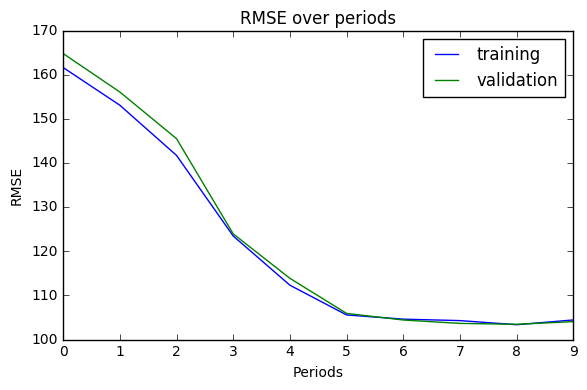

Final RMSE on training: 104.43
Final RMSE on validation: 104.05


In [7]:
nn_regressor_no_normalize_GDO = train_nn_regression_model(
    my_optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.0007),
    steps = 5000,
    batch_size = 70,
    hidden_units =[10,10],
    training_examples=training_examples,
    training_targets=training_targets,
    validation_examples=validation_examples,
    validation_targets=validation_targets
)

In [8]:
#Linear Scaling
def linear_scale(series):
    min_val=series.min()
    max_val=series.max()
    scale_value = (max_val - min_val)/2.0
    return series.apply(lambda x:((x-min_val) / scale_value) -1.0)

,latitude,longitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,rooms_per_person
10607,0.011690,-0.227092,0.529412,-0.805404,-0.761018,-0.882340,-0.756290,-0.767741,-0.937004
385,-0.942614,0.478088,-0.333333,-0.871095,-0.855680,-0.911993,-0.845091,-0.704418,-0.944295
4829,-0.708820,0.247012,-0.490196,-0.875208,-0.812849,-0.913507,-0.847722,-0.545248,-0.945139
4110,-0.730074,0.268924,0.058824,-0.814103,-0.747052,-0.871017,-0.749054,-0.712818,-0.945179
3217,-0.736451,0.294821,-0.137255,-0.832081,-0.730292,-0.889347,-0.720112,-0.600833,-0.942252
7024,-0.730074,0.203187,-0.137255,-0.792276,-0.768156,-0.906051,-0.766486,-0.501110,-0.915595
16047,0.224230,-0.621514,-0.098039,-0.897509,-0.876164,-0.959920,-0.875349,-0.579206,-0.902462
12678,0.092455,-0.484064,1.000000,-0.886385,-0.870577,-0.948093,-0.862523,-0.554461,-0.916536
16868,0.687566,-0.876494,-0.058824,-0.893871,-0.837678,-0.958351,-0.917777,-0.832361,-0.902797
13671,0.024442,-0.529880,0.254902,-0.865929,-0.855369,-0.928025,-0.849696,-0.310341,-0.929013


,latitude,longitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,rooms_per_person
10607,0.011690,-0.227092,0.529412,-0.805404,-0.761018,-0.882340,-0.756290,-0.767741,-0.937004
385,-0.942614,0.478088,-0.333333,-0.871095,-0.855680,-0.911993,-0.845091,-0.704418,-0.944295
4829,-0.708820,0.247012,-0.490196,-0.875208,-0.812849,-0.913507,-0.847722,-0.545248,-0.945139
4110,-0.730074,0.268924,0.058824,-0.814103,-0.747052,-0.871017,-0.749054,-0.712818,-0.945179
3217,-0.736451,0.294821,-0.137255,-0.832081,-0.730292,-0.889347,-0.720112,-0.600833,-0.942252
7024,-0.730074,0.203187,-0.137255,-0.792276,-0.768156,-0.906051,-0.766486,-0.501110,-0.915595
16047,0.224230,-0.621514,-0.098039,-0.897509,-0.876164,-0.959920,-0.875349,-0.579206,-0.902462
12678,0.092455,-0.484064,1.000000,-0.886385,-0.870577,-0.948093,-0.862523,-0.554461,-0.916536
16868,0.687566,-0.876494,-0.058824,-0.893871,-0.837678,-0.958351,-0.917777,-0.832361,-0.902797
13671,0.024442,-0.529880,0.254902,-0.865929,-0.855369,-0.928025,-0.849696,-0.310341,-0.929013


,latitude,longitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,rooms_per_person
14540,0.092455,-0.561753,0.333333,-0.861342,-0.861577,-0.924549,-0.840487,-0.463938,-0.929969
786,-0.987248,0.452191,-0.098039,-0.942744,-0.917132,-0.938788,-0.919421,-0.735286,-0.964657
7994,-0.706695,0.183267,0.215686,-0.863556,-0.811918,-0.936713,-0.817793,-0.485055,-0.917763
50,-0.642933,0.758964,0.137255,-0.971636,-0.958101,-0.993329,-0.979609,-0.885050,-0.840296
12905,0.015940,-0.498008,-0.215686,-0.759747,-0.639354,-0.712940,-0.630653,-0.626860,-0.968420
1532,-0.929862,0.422311,-0.568627,-0.924819,-0.906269,-0.970571,-0.911857,-0.497524,-0.902671
9268,-0.407014,0.045817,-0.882353,-0.650033,-0.721601,-0.825219,-0.703667,-0.136688,-0.923576
16945,0.710946,-0.958167,-0.176471,-0.912324,-0.874612,-0.953866,-0.874692,-0.853437,-0.927626
1916,-0.664187,0.406375,0.529412,-0.884223,-0.810366,-0.915132,-0.825687,-0.917905,-0.948162
10077,-0.113709,-0.093625,0.098039,-0.918861,-0.909994,-0.943720,-0.897385,-0.792499,-0.945213


INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_num_worker_replicas': 1, '_model_dir': 'C:\\Users\\STRIKE~1\\AppData\\Local\\Temp\\tmpb6g3m1lu', '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x0000028E24C9B860>, '_is_chief': True, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_service': None, '_save_checkpoints_secs': 600, '_save_summary_steps': 100, '_session_config': None, '_save_checkpoints_steps': None, '_tf_random_seed': None, '_keep_checkpoint_max': 5, '_task_type': 'worker', '_num_ps_replicas': 0, '_master': '', '_task_id': 0}
Training Model...
RMSE on training data: 
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Saving checkpoints for 1 into C:\Users\STRIKE~1\AppData\Local\Temp\tmpb6g3m1lu\model.ckpt.
INFO:tensorflow:step = 1, loss = 3231760.5
INFO:tensorflow:global_step/sec: 235.057
INFO:tensorflow:step = 101, loss = 2497465.2 (0.426 sec)
INFO:tensorflow:Saving checkpoints for 200 in

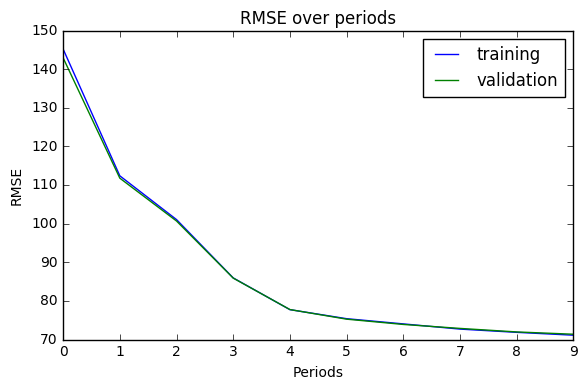

Final RMSE on training: 71.11
Final RMSE on validation: 71.36


In [14]:
#Normalize the features using linear scaling
def normalize_linear_scale(examples_df):
    #Return a version of input DataFram that has all of its features normalized linearly
    processed_features = pd.DataFrame()
    processed_features['latitude'] = linear_scale(examples_df['latitude'])
    processed_features['longitude'] = linear_scale(examples_df['longitude'])
    processed_features['housing_median_age'] = linear_scale(examples_df['housing_median_age'])
    processed_features['total_rooms'] = linear_scale(examples_df['total_rooms'])
    processed_features['total_bedrooms'] = linear_scale(examples_df['total_bedrooms'])
    processed_features['population'] = linear_scale(examples_df['population'])
    processed_features['households'] = linear_scale(examples_df['households'])
    processed_features['median_income'] = linear_scale(examples_df['median_income'])
    processed_features['rooms_per_person'] = linear_scale(examples_df['rooms_per_person'])
    return processed_features

normalized_df = normalize_linear_scale(preprocess_features(california_housing_df))
normalized_training_examples = normalized_df.head(12000)
normalized_validation_examples = normalized_df.tail(5000)

display.display(normalized_df)
display.display(normalized_training_examples)
display.display(normalized_validation_examples)

nn_regressor_linear_scale_normalize_GDO = train_nn_regression_model(
    my_optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.005),
    steps=2000,
    batch_size=50,
    hidden_units=[10,10],
    training_examples=normalized_training_examples,
    training_targets=training_targets,
    validation_examples=normalized_validation_examples,
    validation_targets=validation_targets)

Try different optimizer

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_num_worker_replicas': 1, '_model_dir': 'C:\\Users\\STRIKE~1\\AppData\\Local\\Temp\\tmpdvk417im', '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x0000028E0F81F278>, '_is_chief': True, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_service': None, '_save_checkpoints_secs': 600, '_save_summary_steps': 100, '_session_config': None, '_save_checkpoints_steps': None, '_tf_random_seed': None, '_keep_checkpoint_max': 5, '_task_type': 'worker', '_num_ps_replicas': 0, '_master': '', '_task_id': 0}
Training Model...
RMSE on training data: 
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Saving checkpoints for 1 into C:\Users\STRIKE~1\AppData\Local\Temp\tmpdvk417im\model.ckpt.
INFO:tensorflow:step = 1, loss = 5985263.0
INFO:tensorflow:Saving checkpoints for 50 into C:\Users\STRIKE~1\AppData\Local\Temp\tmpdvk417im\model.ckpt.
INFO:tensorflow:Loss for final step

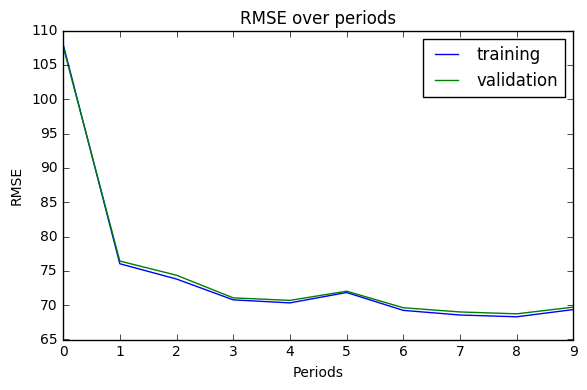

Final RMSE on training: 69.36
Final RMSE on validation: 69.72


In [15]:
nn_regressor_linear_scale_normalize_adagradOptimizer, adagrad_training_losses, adagrad_validation_losses = train_nn_regression_model(
    my_optimizer=tf.train.AdagradOptimizer(learning_rate=0.5),
    steps=500,
    batch_size=100,
    hidden_units=[10,10],
    training_examples=normalized_training_examples,
    training_targets=training_targets,
    validation_examples=normalized_validation_examples,
    validation_targets=validation_targets)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_num_worker_replicas': 1, '_model_dir': 'C:\\Users\\STRIKE~1\\AppData\\Local\\Temp\\tmpeh3rc3o_', '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x0000028E3064B5C0>, '_is_chief': True, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_service': None, '_save_checkpoints_secs': 600, '_save_summary_steps': 100, '_session_config': None, '_save_checkpoints_steps': None, '_tf_random_seed': None, '_keep_checkpoint_max': 5, '_task_type': 'worker', '_num_ps_replicas': 0, '_master': '', '_task_id': 0}
Training Model...
RMSE on training data: 
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Saving checkpoints for 1 into C:\Users\STRIKE~1\AppData\Local\Temp\tmpeh3rc3o_\model.ckpt.
INFO:tensorflow:step = 1, loss = 5551609.5
INFO:tensorflow:Saving checkpoints for 50 into C:\Users\STRIKE~1\AppData\Local\Temp\tmpeh3rc3o_\model.ckpt.
INFO:tensorflow:Loss for final step

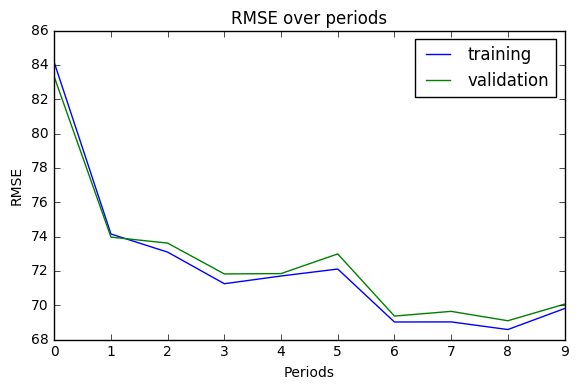

Final RMSE on training: 69.80
Final RMSE on validation: 70.06


In [16]:
nn_regressor_linear_scale_normalize_adamOptimizer, adam_training_losses, adam_validation_losses = train_nn_regression_model(
    my_optimizer=tf.train.AdagradOptimizer(learning_rate=0.5),
    steps=500,
    batch_size=100,
    hidden_units=[10,10],
    training_examples=normalized_training_examples,
    training_targets=training_targets,
    validation_examples=normalized_validation_examples,
    validation_targets=validation_targets)

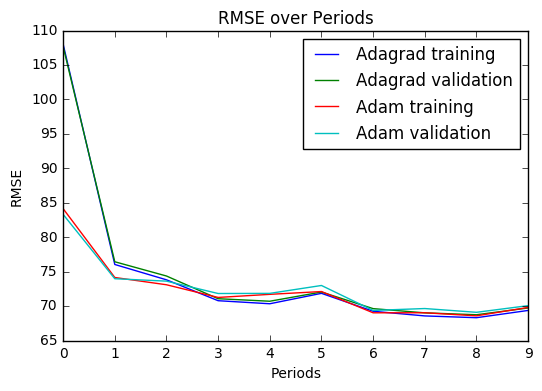

In [17]:
#Print a graph of losses metrics side by side
plt.xlabel('Periods')
plt.ylabel('RMSE')
plt.title('RMSE over Periods')
plt.plot(adagrad_training_losses, label='Adagrad training')
plt.plot(adagrad_validation_losses, label='Adagrad validation')
plt.plot(adam_training_losses, label='Adam training')
plt.plot(adam_validation_losses, label='Adam validation')
_ = plt.legend()
plt.show()

Explore Alternate Normalization Methods

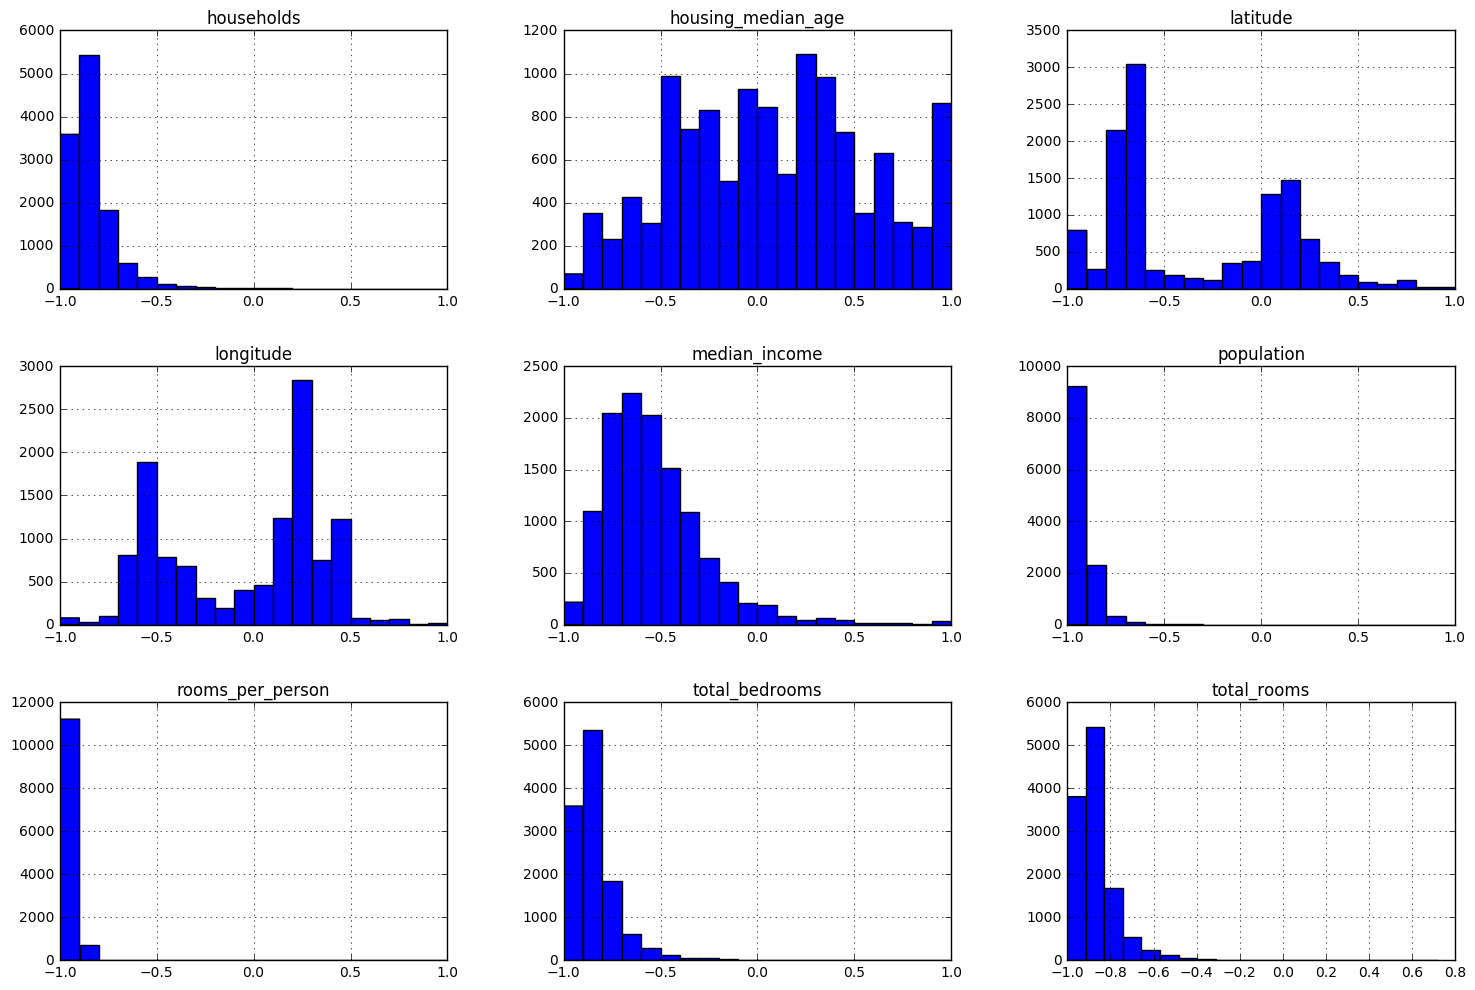

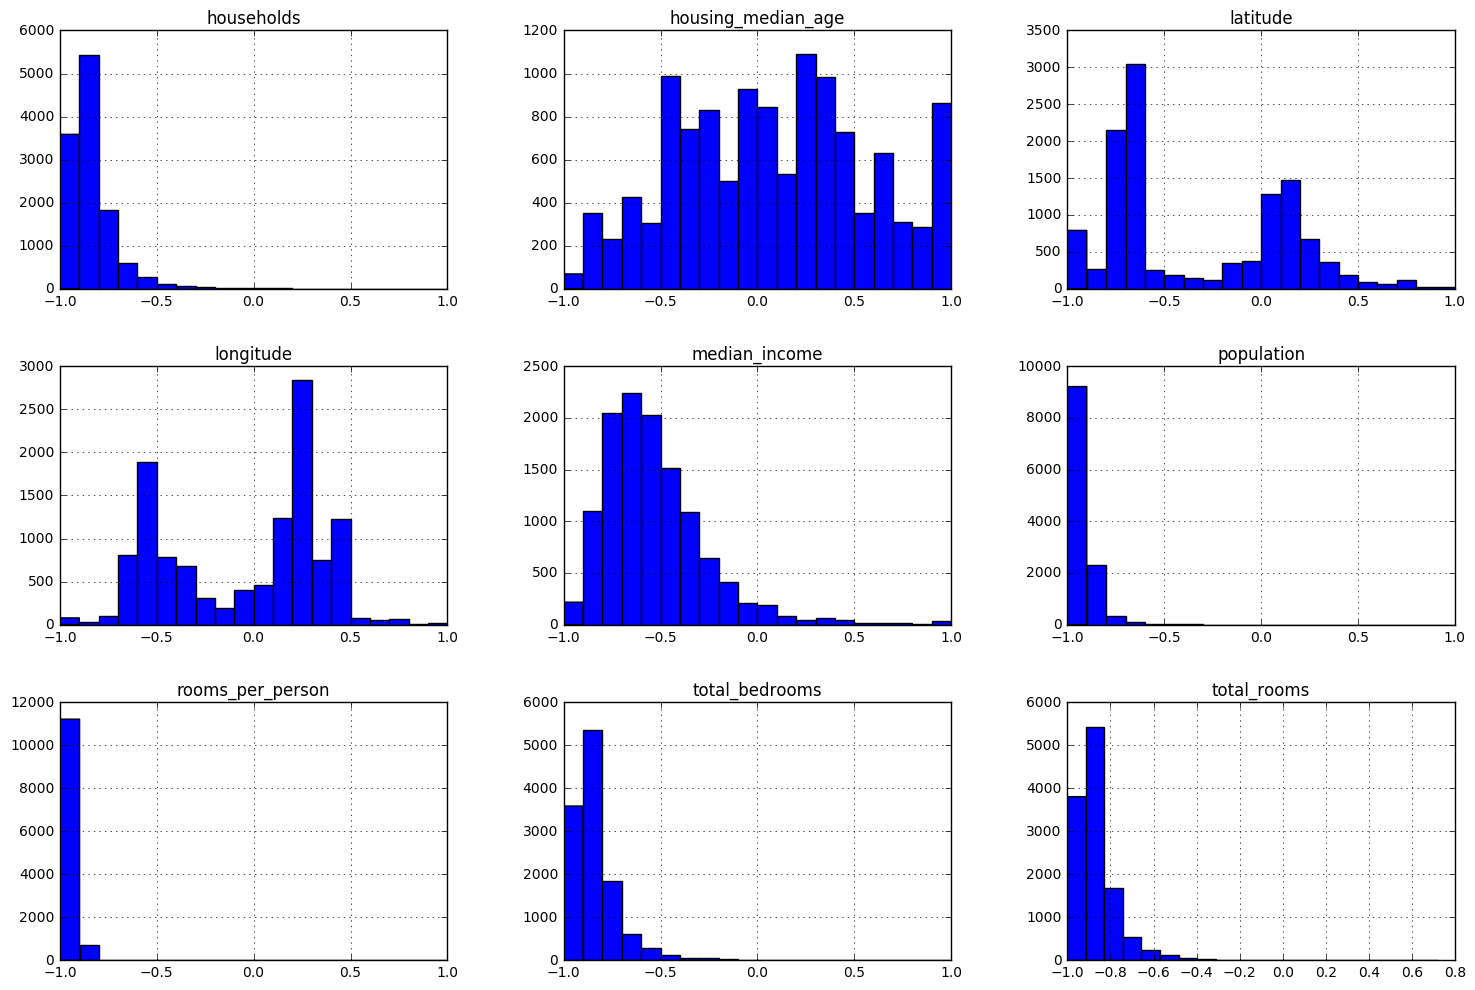

In [19]:
_ = normalized_training_examples.hist(bins=20, figsize=(18,12), xlabelsize=10)
plt.show()

In [21]:
#Others way to scaling features
def log_normalize(series):
    return series.apply(lambda x:math.log(x+1.0))

def clip(series, clip_to_min, clip_to_max):
    return series.apply(lambda x:(min(max(x, clip_to_min), clip_to_max)))

def z_score_normalize(series):
    mean=series.mean()
    std_dv=series.std()
    return series.apply(lambda x:(x-mean)/std_dv)

def binary_threshold(series, threshold):
    return series.apply(lambda x:(1 if x>threshold else 0))

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_num_worker_replicas': 1, '_model_dir': 'C:\\Users\\STRIKE~1\\AppData\\Local\\Temp\\tmpze6mrpg9', '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x0000028E3548C668>, '_is_chief': True, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_service': None, '_save_checkpoints_secs': 600, '_save_summary_steps': 100, '_session_config': None, '_save_checkpoints_steps': None, '_tf_random_seed': None, '_keep_checkpoint_max': 5, '_task_type': 'worker', '_num_ps_replicas': 0, '_master': '', '_task_id': 0}
Training Model...
RMSE on training data: 
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Saving checkpoints for 1 into C:\Users\STRIKE~1\AppData\Local\Temp\tmpze6mrpg9\model.ckpt.
INFO:tensorflow:step = 1, loss = 3024236.8
INFO:tensorflow:Saving checkpoints for 100 into C:\Users\STRIKE~1\AppData\Local\Temp\tmpze6mrpg9\model.ckpt.
INFO:tensorflow:Loss for final ste

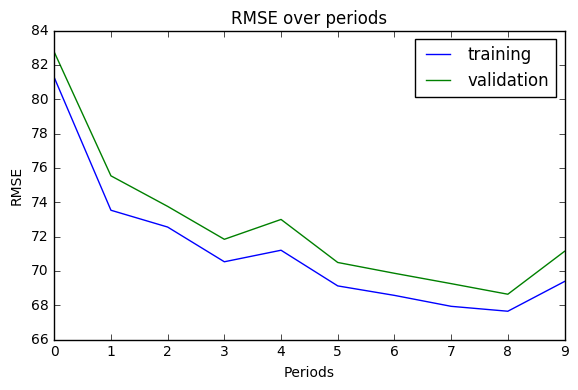

Final RMSE on training: 69.38
Final RMSE on validation: 71.14


In [22]:
#Try others way to normalized features
def normalize(examples_df):
    #Return a version of input DataFrame that has all its features normalized
    processed_features = pd.DataFrame()
    
    processed_features['households'] = log_normalize(examples_df['households'])
    processed_features['median_income'] = log_normalize(examples_df['median_income'])
    processed_features['total_bedrooms'] = log_normalize(examples_df['total_bedrooms'])
    
    processed_features['latitude'] = linear_scale(examples_df['latitude'])
    processed_features['longitude'] = linear_scale(examples_df['longitude'])
    processed_features['housing_median_age'] = linear_scale(examples_df['housing_median_age'])
    
    processed_features['population'] = linear_scale(clip(examples_df['population'], 0, 5000))
    processed_features['rooms_per_person'] = linear_scale(clip(examples_df['rooms_per_person'], 0, 5))
    processed_features['total_rooms'] = linear_scale(clip(examples_df['total_rooms'], 0, 10000))
    
    return processed_features

normalized_df = normalize(preprocess_features(california_housing_df))
normalized_training_examples = normalized_df.head(12000)
normalized_validation_examples = normalized_df.tail(5000)

nn_regressor_many_ways_normalize_adagradOptimizer = train_nn_regression_model(
    my_optimizer=tf.train.AdagradOptimizer(learning_rate=0.15),
    steps=1000,
    batch_size=50,
    hidden_units=[10,10],
    training_examples=normalized_training_examples,
    training_targets=training_targets,
    validation_examples=normalized_validation_examples,
    validation_targets=validation_targets)

In [ ]:
nn_regressor_many_ways_normalize_adagradOptimizer_many_hiddenunits = train_nn_regression_model(
    my_optimizer=tf.train.AdagradOptimizer(learning_rate=0.05),
    steps=500,
    batch_size=50,
    hidden_units=[10,10,5,5,5],
    training_examples=normalized_training_examples,
    training_targets=training_targets,
    validation_examples=normalized_validation_examples,
    validation_targets=validation_targets)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_num_worker_replicas': 1, '_model_dir': 'C:\\Users\\STRIKE~1\\AppData\\Local\\Temp\\tmpgldlk0bw', '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x0000028E376E61D0>, '_is_chief': True, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_service': None, '_save_checkpoints_secs': 600, '_save_summary_steps': 100, '_session_config': None, '_save_checkpoints_steps': None, '_tf_random_seed': None, '_keep_checkpoint_max': 5, '_task_type': 'worker', '_num_ps_replicas': 0, '_master': '', '_task_id': 0}
Training Model...
RMSE on training data: 
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Saving checkpoints for 1 into C:\Users\STRIKE~1\AppData\Local\Temp\tmpgldlk0bw\model.ckpt.
INFO:tensorflow:step = 1, loss = 3361108.0
INFO:tensorflow:Saving checkpoints for 50 into C:\Users\STRIKE~1\AppData\Local\Temp\tmpgldlk0bw\model.ckpt.
INFO:tensorflow:Loss for final step